In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Section 3 data.csv")
data.head()

,3.356726646,3.4246883392333984,3.315129280090332,2.866584539413452,3.2591633796691895,3.063363790512085,3.02205228805542,3.709723949432373,3.0598325729370117,2.890528678894043,...,3.2995495796203613,3.197462558746338,3.1719608306884766,3.526296615600586,3.013812303543091,3.373962879180908,3.448312759399414,3.622835636138916,3.211477041244507,3.4222567081451416
0,3.264011,3.331538,3.254502,2.816155,3.175651,2.995944,2.963060,3.618391,3.015709,2.849339,...,3.220985,3.110368,3.108212,3.489397,2.960912,3.306820,3.417709,3.524081,3.141618,3.361223
1,3.170393,3.238018,3.185075,2.759907,3.089149,2.929650,2.906405,3.522798,2.967472,2.804227,...,3.139422,3.024213,3.043078,3.437473,2.904058,3.234052,3.370602,3.421170,3.069848,3.288135
2,3.073419,3.143099,3.082911,2.682017,2.991492,2.867536,2.858474,3.411356,2.903908,2.744555,...,3.046735,2.941585,2.972789,3.329692,2.832499,3.140333,3.262105,3.302803,2.990968,3.170215
3,2.976448,3.048187,2.980743,2.604133,2.893835,2.805416,2.810538,3.299923,2.840350,2.684883,...,2.954042,2.858966,2.902495,3.221916,2.760934,3.046621,3.153600,3.184436,2.912082,3.052295
4,2.879478,2.953276,2.878582,2.526245,2.796179,2.743304,2.762607,3.188490,2.776787,2.625209,...,2.861355,2.776344,2.832206,3.114133,2.689374,2.952907,3.045095,3.066068,2.833202,2.934375


In [2]:
matrix = data.values

In [3]:
mean = np.mean(matrix)
median = np.median(matrix)
std_dev = np.std(matrix)
max_val = np.max(matrix)
min_val = np.min(matrix)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"Maximum Value: {max_val}")
print(f"Minimum Value: {min_val}")

Mean: 4.777079656112623
Median: 2.4703612327575684
Standard Deviation: 6.131843759505156
Maximum Value: 99.21334075927734
Minimum Value: 0.4554190933704376


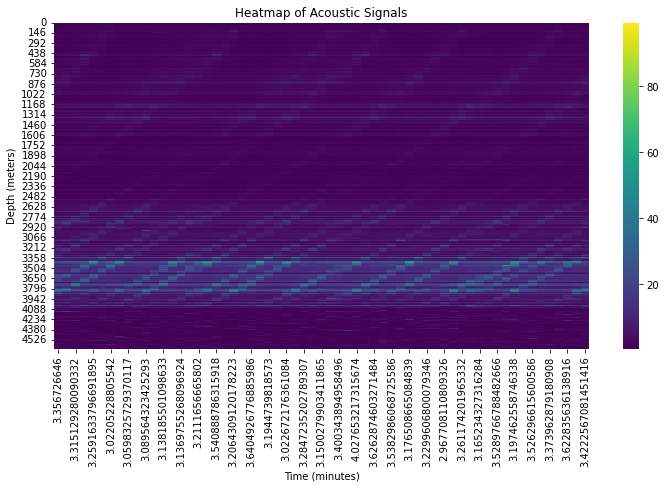

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(data, cmap='viridis', annot=False)
plt.title('Heatmap of Acoustic Signals')
plt.xlabel('Time (minutes)')
plt.ylabel('Depth (meters)')
plt.show()

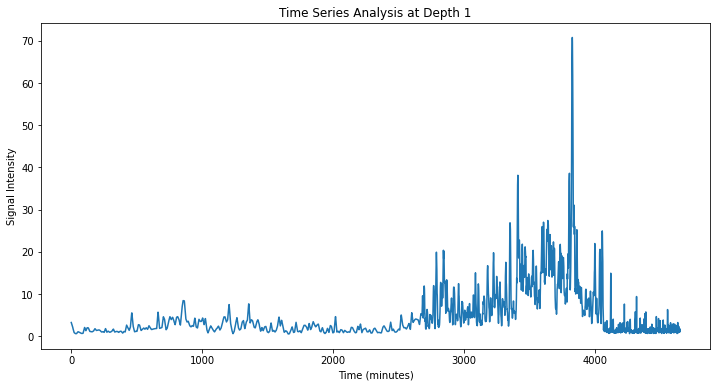

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data.iloc[:, 0])  # Example for the first depth
plt.title('Time Series Analysis at Depth 1')
plt.xlabel('Time (minutes)')
plt.ylabel('Signal Intensity')
plt.show()

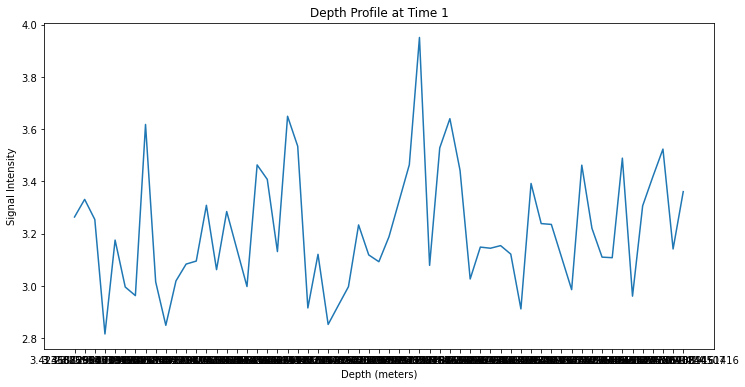

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(data.iloc[0, :])  # Example for the first time
plt.title('Depth Profile at Time 1')
plt.xlabel('Depth (meters)')
plt.ylabel('Signal Intensity')
plt.show()

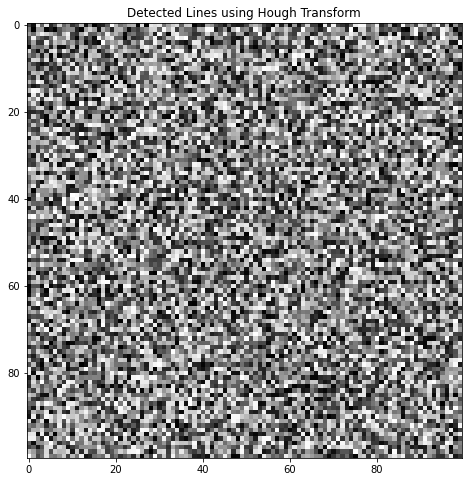

In [13]:
#pip install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Example data matrix
data_matrix = np.random.random((100, 100)) * 255
data_image = np.uint8(data_matrix)

# Apply Canny edge detection
edges = cv2.Canny(data_image, 50, 150)

# Apply Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

# Initialize a blank image for drawing lines
line_image = np.copy(data_image).astype(np.uint8)

# Draw lines on the image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (255), 2)  # Grayscale image, color value as a tuple

# Plot the result
plt.figure(figsize=(10, 8))
plt.imshow(line_image, cmap='gray')
plt.title('Detected Lines using Hough Transform')
plt.show()


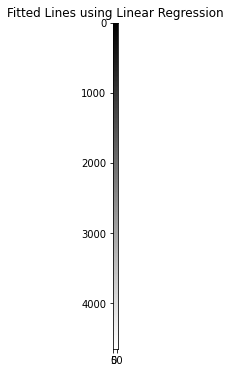

In [14]:
from sklearn.linear_model import LinearRegression

# Flatten the matrix and prepare for line fitting
X = np.arange(matrix.size).reshape(-1, 1)
y = matrix.flatten()

# Fit a linear model
model = LinearRegression()
model.fit(X, y)

# Predict and reshape back to matrix shape
predicted = model.predict(X).reshape(matrix.shape)

plt.figure(figsize=(12, 6))
plt.imshow(predicted, cmap='gray')
plt.title('Fitted Lines using Linear Regression')
plt.show()